In [12]:
import polars as pl
import os

import sys
sys.path.append('..')
from src import PlottingFunctions

plotter = PlottingFunctions.Plotter()
import numpy as np
import json

from skimage import measure

from src import IOFunctions; IO = IOFunctions.IO_Functions()

import matplotlib.pyplot as plt

from src import AnalysisFunctions; A_F = AnalysisFunctions.Analysis_Functions()

from src import CoincidenceFunctions; C_F = CoincidenceFunctions.Coincidence_Functions()

import skimage

In [13]:
from skimage.morphology import (
    ball,
)

overall_dims = (200, 200, 200)
struc_3d = ball(100)
xpad = int((overall_dims[0]-struc_3d.shape[0])/2)
ypad = int((overall_dims[1]-struc_3d.shape[1])/2)
zpad = int((overall_dims[2]-struc_3d.shape[2])/2)
struc_3d = np.pad(struc_3d, ((xpad, xpad), (ypad, ypad), (zpad, zpad)), 'constant', constant_values=((0, 0), (0, 0), (0, 0)))

In [14]:
def get_cube(limits=None):
    """get the vertices, edges, and faces of a cuboid defined by its limits

    limits = np.array([[x_min, x_max],
                       [y_min, y_max],
                       [z_min, z_max]])
    """
    v = np.array([[0, 0, 0], [0, 0, 1],
                  [0, 1, 0], [0, 1, 1],
                  [1, 0, 0], [1, 0, 1],
                  [1, 1, 0], [1, 1, 1]], dtype=int)

    if limits is not None:
        v = limits[np.arange(3)[np.newaxis, :].repeat(8, axis=0), v]

    e = np.array([[0, 1], [0, 2], [0, 4],
                  [1, 3], [1, 5],
                  [2, 3], [2, 6],
                  [3, 7],
                  [4, 5], [4, 6],
                  [5, 7],
                  [6, 7]], dtype=int)

    f = np.array([[0, 2, 3, 1],
                  [0, 4, 5, 1],
                  [0, 4, 6, 2],
                  [1, 5, 7, 3],
                  [2, 6, 7, 3],
                  [4, 6, 7, 5]], dtype=int)

    return v, e, f

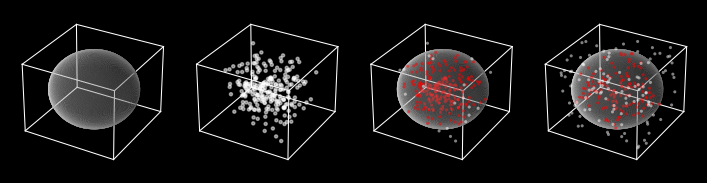

In [11]:
import matplotlib  # requires 3.8.0
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')

width = 7.08
xsize = width if width else 5 * ncolumns if big else 7.08  # Adjust column size
ysize = 2.23
fontsz = 7
lw = 0.75
ncolumns = 4
nrows = 1
widthratio = [1,1,1,1]
heightratio = [1]

# Apply global plotting configurations
plt.rcParams.update(
    {
        "figure.figsize": [xsize, ysize],
        "font.size": fontsz,
        "svg.fonttype": "none",
        "axes.linewidth": lw,
    }
)
matplotlib.rcParams.update({"pdf.fonttype": 42, "ps.fonttype": 42})

# Create figure and axes
fig, axs = plt.subplots(
    nrows,
    ncolumns,
    gridspec_kw={"height_ratios": heightratio, "width_ratios": widthratio},
    subplot_kw={"projection": "3d"}
)

ax = axs[0]
ax.voxels(struc_3d, edgecolor=None, alpha=0.3, facecolors='white', rasterized=True)

ax.grid(False) 
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])

# Set limits of the plot from coord limits
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
zmin, zmax = ax.get_zlim()

limits = np.array([[xmin, xmax],
                   [ymin, ymax],
                   [zmin, zmax]])

v, e, f = get_cube(limits)

for i, j in e:
    ax.plot(*v[[i, j], :].T, color='white', ls='-', lw=0.75)
    
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
ax.set_axis_off()




# Make data
np.random.seed(19680801)
n = 250
rng = np.random.default_rng()

tri_min, tri_max = 0, max(struc_3d.shape)
mode = max(struc_3d.shape)/2
xs = rng.triangular(tri_min, mode, tri_max, n)
ys = rng.triangular(tri_min, mode, tri_max, n)
zs = rng.triangular(tri_min, mode, tri_max, n)

# Plot
ax = axs[1]
ax.scatter(xs, ys, zs, color='white', alpha=0.5, s=5)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

v, e, f = get_cube(limits)

for i, j in e:
    ax.plot(*v[[i, j], :].T, color='white', ls='-', lw=0.75)
    
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
ax.set_axis_off()

# Plot



in_points = np.where(struc_3d[np.asarray(xs, dtype=int), np.asarray(ys, dtype=int), np.asarray(zs, dtype=int)] == 1)[0]
out_points = np.where(struc_3d[np.asarray(xs, dtype=int), np.asarray(ys, dtype=int), np.asarray(zs, dtype=int)] == 0)[0]
ax = axs[2]
ax.scatter(xs[in_points], ys[in_points], zs[in_points], color='red', alpha=0.5, s=5, linewidths=0)
ax.scatter(xs[out_points], ys[out_points], zs[out_points], color='white', alpha=0.5, s=5, linewidths=0)
ax.voxels(struc_3d, edgecolor=None, alpha=0.3, facecolors='white', rasterized=True)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

v, e, f = get_cube(limits)

for i, j in e:
    ax.plot(*v[[i, j], :].T, color='white', ls='-', lw=0.75)
    
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
ax.set_axis_off()

# Plot
ax = axs[3]
rng = np.random.default_rng()
xs = rng.uniform(0, max(struc_3d.shape), n)
ys = rng.uniform(0, max(struc_3d.shape), n)
zs = rng.uniform(0, max(struc_3d.shape), n)

in_points = np.where(struc_3d[np.asarray(xs, dtype=int), np.asarray(ys, dtype=int), np.asarray(zs, dtype=int)] == 1)[0]
out_points = np.where(struc_3d[np.asarray(xs, dtype=int), np.asarray(ys, dtype=int), np.asarray(zs, dtype=int)] == 0)[0]
ax = axs[3]
ax.scatter(xs[in_points], ys[in_points], zs[in_points], color='red', alpha=0.5, s=5, linewidths=0)
ax.scatter(xs[out_points], ys[out_points], zs[out_points], color='white', alpha=0.5, s=5, linewidths=0)
ax.voxels(struc_3d, edgecolor=None, alpha=0.3, facecolors='white', rasterized=True)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

v, e, f = get_cube(limits)

for i, j in e:
    ax.plot(*v[[i, j], :].T, color='white', ls='-', lw=0.75)
    
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
ax.set_axis_off()


fig.tight_layout()

plt.savefig('hypothetical_cell.svg', dpi=600, format='svg')

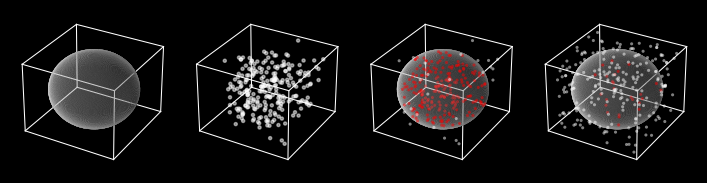

In [16]:
import matplotlib  # requires 3.8.0
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')

width = 7.08
xsize = width if width else 5 * ncolumns if big else 7.08  # Adjust column size
ysize = 2.23
fontsz = 7
lw = 0.75
ncolumns = 4
nrows = 1
widthratio = [1,1,1,1]
heightratio = [1]

# Apply global plotting configurations
plt.rcParams.update(
    {
        "figure.figsize": [xsize, ysize],
        "font.size": fontsz,
        "svg.fonttype": "none",
        "axes.linewidth": lw,
    }
)
matplotlib.rcParams.update({"pdf.fonttype": 42, "ps.fonttype": 42})

# Create figure and axes
fig, axs = plt.subplots(
    nrows,
    ncolumns,
    gridspec_kw={"height_ratios": heightratio, "width_ratios": widthratio},
    subplot_kw={"projection": "3d"}
)

ax = axs[0]
ax.voxels(struc_3d, edgecolor=None, alpha=0.3, facecolors='white', rasterized=True)

ax.grid(False) 
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.zaxis.set_ticks([])

# Set limits of the plot from coord limits
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
zmin, zmax = ax.get_zlim()

limits = np.array([[xmin, xmax],
                   [ymin, ymax],
                   [zmin, zmax]])

v, e, f = get_cube(limits)

for i, j in e:
    ax.plot(*v[[i, j], :].T, color='white', ls='-', lw=0.75)
    
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
ax.set_axis_off()

def in_sphere_dense_model(sphere_structure, in_fraction=0.5, out_fraction=0.5, n=250):
    n_sim = n*20
    np.random.seed(19680801)
    rng = np.random.default_rng()
    xs = rng.uniform(0, max(sphere_structure.shape), n_sim)
    ys = rng.uniform(0, max(sphere_structure.shape), n_sim)
    zs = rng.uniform(0, max(sphere_structure.shape), n_sim)
    in_points = np.random.choice(np.where(sphere_structure[np.asarray(xs, dtype=int), np.asarray(ys, dtype=int), np.asarray(zs, dtype=int)] == 1)[0], size=int(n*in_fraction))
    out_points = np.random.choice(np.where(sphere_structure[np.asarray(xs, dtype=int), np.asarray(ys, dtype=int), np.asarray(zs, dtype=int)] == 0)[0], size=int(n*out_fraction))
    xs = np.hstack([xs[in_points], xs[out_points]])
    ys = np.hstack([ys[in_points], ys[out_points]])
    zs = np.hstack([zs[in_points], zs[out_points]])
    return xs, ys, zs


# Make data
n = 250
rng = np.random.default_rng()
xs, ys, zs = in_sphere_dense_model(struc_3d, in_fraction=0.9, out_fraction=0.1, n=250)

# Plot
ax = axs[1]
ax.scatter(xs, ys, zs, color='white', alpha=0.5, s=5)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

v, e, f = get_cube(limits)

for i, j in e:
    ax.plot(*v[[i, j], :].T, color='white', ls='-', lw=0.75)
    
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
ax.set_axis_off()

# Plot



in_points = np.where(struc_3d[np.asarray(xs, dtype=int), np.asarray(ys, dtype=int), np.asarray(zs, dtype=int)] == 1)[0]
out_points = np.where(struc_3d[np.asarray(xs, dtype=int), np.asarray(ys, dtype=int), np.asarray(zs, dtype=int)] == 0)[0]
ax = axs[2]
ax.scatter(xs[in_points], ys[in_points], zs[in_points], color='red', alpha=0.5, s=5, linewidths=0)
ax.scatter(xs[out_points], ys[out_points], zs[out_points], color='white', alpha=0.5, s=5, linewidths=0)
ax.voxels(struc_3d, edgecolor=None, alpha=0.3, facecolors='white', rasterized=True)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

v, e, f = get_cube(limits)

for i, j in e:
    ax.plot(*v[[i, j], :].T, color='white', ls='-', lw=0.75)
    
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
ax.set_axis_off()

# Plot
ax = axs[3]
xs, ys, zs = in_sphere_dense_model(struc_3d, in_fraction=0.1, out_fraction=0.9, n=250)

in_points = np.where(struc_3d[np.asarray(xs, dtype=int), np.asarray(ys, dtype=int), np.asarray(zs, dtype=int)] == 1)[0]
out_points = np.where(struc_3d[np.asarray(xs, dtype=int), np.asarray(ys, dtype=int), np.asarray(zs, dtype=int)] == 0)[0]
ax = axs[3]
ax.scatter(xs[in_points], ys[in_points], zs[in_points], color='red', alpha=0.5, s=5, linewidths=0)
ax.scatter(xs[out_points], ys[out_points], zs[out_points], color='white', alpha=0.5, s=5, linewidths=0)
ax.voxels(struc_3d, edgecolor=None, alpha=0.3, facecolors='white', rasterized=True)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

v, e, f = get_cube(limits)

for i, j in e:
    ax.plot(*v[[i, j], :].T, color='white', ls='-', lw=0.75)
    
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])
ax.set_axis_off()


fig.tight_layout()

plt.savefig('colocalisation_cell_schematic_figure.svg', dpi=600, format='svg')